In [30]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import seaborn as sns; sns.set_theme(color_codes=True)
import os
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
import sklearn.datasets
from matplotlib.patches import Patch
import warnings
import scipy
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

In [31]:
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
sns.set_style(style='white')

In [32]:
from sklearn.cluster import KMeans

In [61]:
GM12878_TADs = pd.read_csv("Carter Lab Datasets/TAD Data/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt", delimiter = "\t")
GM12878_TADs["KMeans_Labels"] = GM12878_kmeans_labels_states
GM12878_TADs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,KMeans_Labels
0,1,144835000,145835000,1,144835000,145835000,"255,255,0",0.55170,0.350090,0.268600,0.43080,0.53910,0
1,1,68985000,70260000,1,68985000,70260000,"255,255,0",0.34374,0.270840,0.295710,0.40022,0.50935,1
2,1,49365000,50810000,1,49365000,50810000,"255,255,0",1.05670,0.240080,0.241480,0.49497,0.68434,1
3,1,163360000,164895000,1,163360000,164895000,"255,255,0",1.15700,0.219040,0.243360,0.71738,0.60165,1
4,1,247800000,248395000,1,247800000,248395000,"255,255,0",0.33524,0.183090,0.273430,0.40819,0.40678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,X,133940000,134045000,X,133940000,134045000,"255,255,0",0.82134,0.017177,0.019672,0.53636,0.55455,1
9270,X,24080000,24165000,X,24080000,24165000,"255,255,0",0.92837,0.022191,0.012027,0.65278,0.51389,1
9271,X,128865000,128960000,X,128865000,128960000,"255,255,0",0.97871,0.010819,0.021867,0.56667,0.67778,2
9272,X,13780000,13880000,X,13780000,13880000,"255,255,0",0.81775,0.014339,0.012749,0.55000,0.63000,4


In [33]:
common_TADs_meQTLs = pd.read_csv("C:/Users/sherv/Desktop/Carter Lab Datasets/common_TADs_meQTLs.csv")
#common_TADs_meQTLs = common_TADs_meQTLs.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)
del common_TADs_meQTLs["#meqtl"]
common_TADs_meQTLs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K4me3,H3K27me3,H4K20me1,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.157722,0.167622,0.705304,4,71,141,950000,0.062006,0.021654,0.047834
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.139404,0.226065,0.369001,4,122,97,825000,0.075906,0.042846,0.037893
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.706817,0.275085,0.000000,4,90,194,340000,0.238009,0.076695,0.183891
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.694064,0.244738,0.000000,4,201,189,655000,0.131405,0.088911,0.092995
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.241590,0.499037,0.704529,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0.000000,0,0,0,205000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,0.570525,1.000000,0.000000,1,0,0,250000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,0.000000,1.000000,1,0,0,235000,0.000000,0.000000,0.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0.000000,1,0,0,155000,0.000000,0.000000,0.000000


In [36]:
unique_meqtls = pd.read_csv("../Carter Lab Datasets/meQTL Data/unique_meqtls.csv")
unique_meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373


In [37]:
num_unique_meqtls = []
for i, row in common_TADs_meQTLs.iterrows():
    if i%100 == 0:
        print(i)
    overlap_chr = unique_meqtls[unique_meqtls["chr"] == "chr"+str(row["chr1"])]
    overlap_snps = overlap_chr[(overlap_chr["bp"] >= row["x1"]) & (overlap_chr["bp"] <= row["x2"])]
    num_unique_meqtls.append(len(overlap_snps))

0
100
200
300
400
500
600
700
800
900
1000


In [38]:
common_TADs_meQTLs["#unique_meqtl"] = num_unique_meqtls
common_TADs_meQTLs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size,#unique_meqtl
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.167622,0.705304,4,71,141,950000,0.062006,0.021654,0.047834,206
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.226065,0.369001,4,122,97,825000,0.075906,0.042846,0.037893,219
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.275085,0.000000,4,90,194,340000,0.238009,0.076695,0.183891,283
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.244738,0.000000,4,201,189,655000,0.131405,0.088911,0.092995,301
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.499037,0.704529,0,26,22,205000,0.053005,0.036747,0.034587,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0,0,0,205000,0.000000,0.000000,0.000000,0
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,1.000000,0.000000,1,0,0,250000,0.000000,0.000000,0.000000,0
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,1.000000,1,0,0,235000,0.000000,0.000000,0.000000,0
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,1,0,0,155000,0.000000,0.000000,0.000000,0


In [39]:
active_TADs = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 2) | (common_TADs_meQTLs["KMeans_State_Labels"] == 3)]
inactive_TADs = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 1) | (common_TADs_meQTLs["KMeans_State_Labels"] == 4)]
mixed_TADs = common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0]


num_active_TADs_meqtls = np.array(active_TADs["#unique_meqtl"])
num_inactive_TADs_meqtls = np.array(inactive_TADs["#unique_meqtl"])
num_mixed_TADs_meqtls = np.array(mixed_TADs["#unique_meqtl"])
num_active_TADs_meqtls

array([222, 197, 489,  82,  72, 302, 397, 450, 338, 299, 250,  30, 203,
       201, 104, 253, 575,  85, 190,  93, 492,  17,  98, 206, 319,  19,
       155, 115, 155, 138, 269,  71,   5, 250, 218, 710, 226, 284, 201,
        38, 147,  72, 269, 250, 163,  33, 197,  71, 516,  57,  21, 184,
       162,   1, 170, 145, 168, 126, 105, 227, 413,  35, 398, 264, 278,
        31, 113,  48, 278, 169,  90, 191, 209, 349,  57, 253, 103,  50,
       200, 249,  27,  89, 395, 441, 299, 247,  92, 154, 155, 165, 201,
       157, 214, 140, 612, 198,  61, 452,  18,  15, 162, 220, 231, 296,
       364, 128,  19, 326, 261,  57, 161,  62,  12,  38, 113,  65,  88,
        50,  97, 219,   8,  40,  53, 102,  50,  82, 346, 360, 204, 308,
       305, 567, 161,  16, 114,   1, 102, 349, 305, 104, 393,  73, 106,
       127, 211, 190, 303, 210,  25, 191,  26, 181, 384, 122, 140, 318,
        97,   5, 221, 215, 176,  83, 220, 181,  25, 198,  94, 166,  23,
       140,  71,  45,  81, 205,  79,  53,  69, 175, 200, 140,  1

In [40]:
num_active_TADs = len(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 2) | (common_TADs_meQTLs["KMeans_State_Labels"] == 3)])
num_inactive_TADs = len(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 1) | (common_TADs_meQTLs["KMeans_State_Labels"] == 4)])
num_mixed_TADs = len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0])

In [11]:
f_oneway(num_active_TADs_meqtls/num_active_TADs, num_inactive_TADs_meqtls/num_inactive_TADs, num_mixed_TADs_meqtls/num_mixed_TADs)

F_onewayResult(statistic=172.14369944548076, pvalue=9.5199969971718e-66)

In [20]:
stats.kruskal(num_active_TADs_meqtls/num_active_TADs, num_inactive_TADs_meqtls/num_inactive_TADs, num_mixed_TADs_meqtls/num_mixed_TADs)

KruskalResult(statistic=263.4650226829368, pvalue=6.155980523737122e-58)

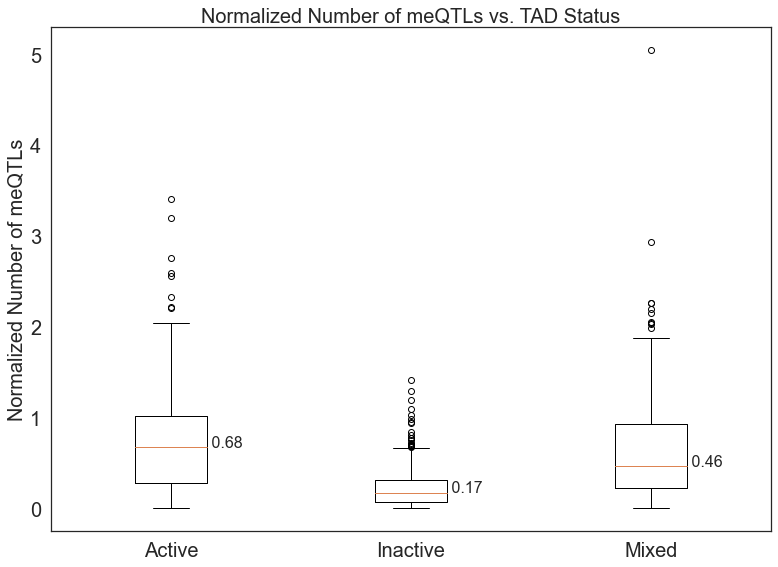

In [45]:
data_nums = [num_active_TADs_meqtls/num_active_TADs, num_inactive_TADs_meqtls/num_inactive_TADs, num_mixed_TADs_meqtls/num_mixed_TADs]
fig_histone1 = plt.figure(figsize =(10, 7))
ax1 = fig_histone1.add_axes([0, 0, 1, 1])
boxplt1 = ax1.boxplot(data_nums)
for i, line in enumerate(boxplt1['medians']):
    x, y = line.get_xydata()[1]
    #text = ' median={:.2f}'.format(np.median(data[i]))
    text = ' {:.2f}'.format(np.median(data_nums[i]))
    ax1.annotate(text, xy=(x, y), fontsize=16)
plt.ylabel("Normalized Number of meQTLs", fontsize=20)
ax1.set_xticklabels(["Active", "Inactive", "Mixed"], fontsize=20)
plt.title("Normalized Number of meQTLs vs. TAD Status", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [43]:
print(np.mean(num_active_TADs_meqtls/num_active_TADs), np.mean(num_inactive_TADs_meqtls/num_inactive_TADs), np.mean(num_mixed_TADs_meqtls/num_mixed_TADs))

0.7556001947893839 0.22000836999459011 0.6410619803476946


In [17]:
f_oneway(np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 1]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 1]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 2]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 2]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 3]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 3]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 4]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 4]))

F_onewayResult(statistic=351.34769012840326, pvalue=1.4437609716237393e-194)

In [19]:
stats.kruskal(np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 1]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 1]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 2]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 2]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 3]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 3]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 4]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 4]))

KruskalResult(statistic=191.46223983066656, pvalue=2.570804729727751e-40)

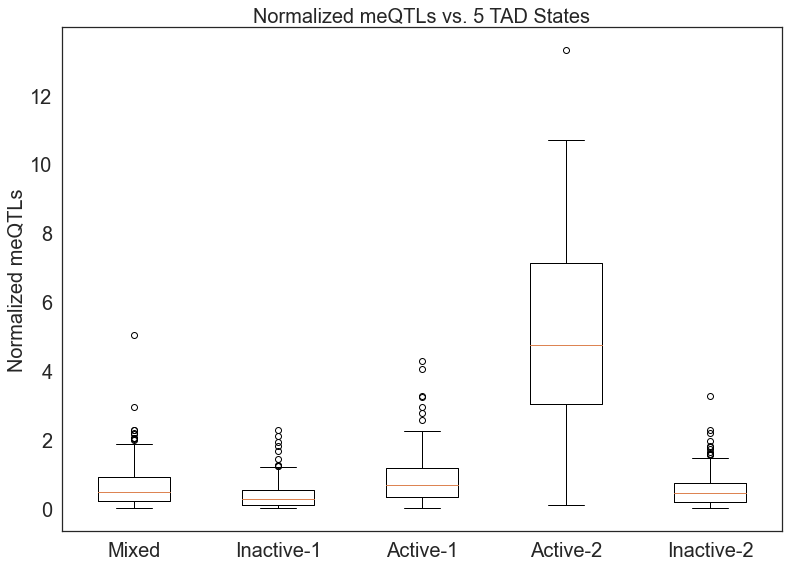

In [18]:
data_nums2 = [np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 0]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 1]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 1]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 2]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 2]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 3]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 3]), np.array(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 4]["#unique_meqtl"])/len(common_TADs_meQTLs[common_TADs_meQTLs["KMeans_State_Labels"] == 4])]
fig_histone2 = plt.figure(figsize =(10, 7))
ax2 = fig_histone2.add_axes([0, 0, 1, 1])
boxplt2 = ax2.boxplot(data_nums2)
plt.ylabel("Normalized meQTLs", fontsize=20)
ax2.set_xticklabels(["Mixed", "Inactive-1", "Active-1", "Active-2", "Inactive-2"], fontsize=20)
plt.title("Normalized meQTLs vs. 5 TAD States", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [8]:
GM12878_enrichments_df = pd.read_csv("C:/Users/sherv/Desktop/Carter Lab Datasets/GM12878_enrichments.csv")
common_TADs_df = pd.read_csv("../Carter Lab Datasets/common_TADs_enrichments.csv")
common_TADs_df = common_TADs_df.drop(["Unnamed: 0"], axis=1)
GM12878_enrichments_df = GM12878_enrichments_df.drop(["Unnamed: 0"], axis = 1)
common_TADs_df

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.000298,0.001788,0.000000,0.000000,0.001192,0.000000,0.014300,0.001490,0.014002,0.000000,0.000000,0.000000,0.012811,0.860698,0.508554
1,0.007075,0.022056,0.000000,0.021224,0.062423,0.002081,0.082399,0.002497,0.107368,0.002497,0.001248,0.004994,0.022472,0.574295,0.804013
2,0.000000,0.016897,0.000000,0.000000,0.070256,0.000000,0.119168,0.000000,0.026679,0.000000,0.000000,0.005336,0.034683,0.944450,0.294362
3,0.001929,0.005788,0.000000,0.054500,0.072346,0.000000,0.025562,0.000482,0.004341,0.001447,0.000000,0.000482,0.009646,0.643393,0.759629
4,0.038102,0.041566,0.003464,0.083132,0.289232,0.005196,0.244202,0.000000,0.055422,0.000000,0.000000,0.000000,0.000000,0.102184,0.912726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.012970,0.011349,0.000000,0.014591,0.695510,0.000000,0.058364,0.003242,0.035667,0.000000,0.000000,0.000000,0.000000,0.126456,0.703616
1096,0.004019,0.001005,0.000000,0.000000,0.000000,0.000000,0.008037,0.000000,0.005023,0.000000,0.000000,0.000000,0.004019,0.271253,0.962444
1097,0.021509,0.009056,0.000000,0.000000,0.217355,0.000000,0.091697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019245,0.971305
1098,0.095734,0.003481,0.000000,0.019147,0.107918,0.000000,0.006962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135768,0.979964


In [16]:
GM12878_enrichments_df

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.069406,0.069840,0.005205,0.120593,0.439862,0.013447,0.114087,0.011279,0.034269,0.000434,0.006073,0.005639,0.137077,0.350502,0.791232
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213,0.000000,0.000000,0.000158,0.000632,0.004742,0.999986
2,0.000000,0.000432,0.000000,0.000000,0.000000,0.000000,0.000288,0.000000,0.002158,0.000000,0.000288,0.000288,0.002446,0.034095,0.999413
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002009,0.000000,0.000937,0.000000,0.000000,0.000000,0.000670,0.024507,0.999697
4,0.001379,0.000345,0.000000,0.000000,0.000000,0.000000,0.001034,0.000000,0.007238,0.000000,0.000000,0.000000,0.001034,0.014476,0.999867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,0.013883,0.000000,0.000000,0.000000,0.025783,0.000000,0.001983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999569
9270,0.002997,0.002997,0.000000,0.221755,0.041954,0.008990,0.020977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.973923
9271,0.004525,0.135755,0.076928,0.235309,0.724026,0.009050,0.352963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099554,0.511344
9272,0.000000,0.003649,0.000000,0.080274,0.262714,0.007298,0.054732,0.000000,0.062030,0.000000,0.000000,0.003649,0.003649,0.748006,0.598405


In [202]:
GM12878_enrichments = GM12878_enrichments_df.to_numpy()
common_TADs_enrichment = common_TADs_df.to_numpy()
common_TADs_enrichment

array([[2.97922545e-04, 1.78753527e-03, 0.00000000e+00, ...,
        1.28106694e-02, 8.60698233e-01, 5.08553784e-01],
       [7.07464459e-03, 2.20562449e-02, 0.00000000e+00, ...,
        2.24724005e-02, 5.74294679e-01, 8.04012550e-01],
       [0.00000000e+00, 1.68969346e-02, 0.00000000e+00, ...,
        3.46831815e-02, 9.44449712e-01, 2.94362387e-01],
       ...,
       [2.15090863e-02, 9.05645740e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.92449720e-02, 9.71305056e-01],
       [9.57335730e-02, 3.48122084e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.35767613e-01, 9.79963666e-01],
       [4.60534326e-02, 7.95468382e-02, 3.97734191e-02, ...,
        0.00000000e+00, 3.97734191e-02, 7.66161652e-01]])

In [48]:
GM12878_enrichments

array([[6.94062897e-02, 6.98400790e-02, 5.20547173e-03, ...,
        1.37077422e-01, 3.50501763e-01, 7.91231703e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.32302304e-04, 4.74226728e-03, 9.99986094e-01],
       [0.00000000e+00, 4.31587610e-04, 0.00000000e+00, ...,
        2.44566312e-03, 3.40954212e-02, 9.99413043e-01],
       ...,
       [4.52516484e-03, 1.35754945e-01, 7.69278023e-02, ...,
        0.00000000e+00, 9.95536265e-02, 5.11343627e-01],
       [0.00000000e+00, 3.64880890e-03, 0.00000000e+00, ...,
        3.64880890e-03, 7.48005825e-01, 5.98404660e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99898833e-01]])

In [49]:
GM12878_kmeans_states = KMeans(n_clusters=5)
GM12878_kmeans_states.fit(GM12878_enrichments)

KMeans(n_clusters=5)

In [50]:
GM12878_kmeans_labels_states = GM12878_kmeans_states.labels_
GM12878_kmeans_labels_states

array([0, 1, 1, ..., 2, 4, 1])

In [151]:
GM12878_kmeans_colors_states = []
for lab in GM12878_kmeans_labels_states:
    if lab == 0:
        GM12878_kmeans_colors_states.append("mediumpurple")
    elif lab == 1:
        GM12878_kmeans_colors_states.append("grey")
    elif lab == 2:
        GM12878_kmeans_colors_states.append("deepskyblue")
    elif lab == 3:
        GM12878_kmeans_colors_states.append("orange")
    else:
        GM12878_kmeans_colors_states.append("red")
print(len(GM12878_kmeans_colors_states))

9274


In [52]:
GM12878_kmeans_colors_states

['mediumpurple',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'deepskyblue',
 'grey',
 'grey',
 'grey',
 'red',
 'red',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'mediumpurple',
 'grey',
 'red',
 'grey',
 'mediumpurple',
 'mediumpurple',
 'deepskyblue',
 'mediumpurple',
 'mediumpurple',
 'grey',
 'grey',
 'red',
 'grey',
 'grey',
 'mediumpurple',
 'mediumpurple',
 'mediumpurple',
 'red',
 'grey',
 'mediumpurple',
 'grey',
 'grey',
 'deepskyblue',
 'grey',
 'deepskyblue',
 'grey',
 'deepskyblue',
 'red',
 'grey',
 'grey',
 'grey',
 'mediumpurple',
 'grey',
 'deepskyblue',
 'grey',
 'grey',
 'grey',
 'deepskyblue',
 'red',
 'grey',
 'mediumpurple',
 'grey',
 'orange',
 'grey',
 'red',
 'mediumpurple',
 'grey',
 'red',
 'grey',
 'deepskyblue',
 'mediumpurple',
 'grey',
 'grey',
 'grey',
 'mediumpurple',
 'mediumpurple',
 'grey',
 'dee

In [82]:
GM12878_enrichments_df = GM12878_enrichments_df.drop(["KMeans_Labels"], axis = 1)
GM12878_enrichments_df

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.069406,0.069840,0.005205,0.120593,0.439862,0.013447,0.114087,0.011279,0.034269,0.000434,0.006073,0.005639,0.137077,0.350502,0.791232
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213,0.000000,0.000000,0.000158,0.000632,0.004742,0.999986
2,0.000000,0.000432,0.000000,0.000000,0.000000,0.000000,0.000288,0.000000,0.002158,0.000000,0.000288,0.000288,0.002446,0.034095,0.999413
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002009,0.000000,0.000937,0.000000,0.000000,0.000000,0.000670,0.024507,0.999697
4,0.001379,0.000345,0.000000,0.000000,0.000000,0.000000,0.001034,0.000000,0.007238,0.000000,0.000000,0.000000,0.001034,0.014476,0.999867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,0.013883,0.000000,0.000000,0.000000,0.025783,0.000000,0.001983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999569
9270,0.002997,0.002997,0.000000,0.221755,0.041954,0.008990,0.020977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.973923
9271,0.004525,0.135755,0.076928,0.235309,0.724026,0.009050,0.352963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099554,0.511344
9272,0.000000,0.003649,0.000000,0.080274,0.262714,0.007298,0.054732,0.000000,0.062030,0.000000,0.000000,0.003649,0.003649,0.748006,0.598405


In [184]:
GM12878_enrichments_df["KMeans_State_Labels"] = GM12878_kmeans_labels_states

In [185]:
labels_0_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 0)]
labels_1_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 1)]
labels_2_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 2)]
labels_3_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 3)]
labels_4_enrich = GM12878_enrichments_df[(GM12878_enrichments_df["KMeans_State_Labels"] == 4)]

In [186]:
frames = [labels_0_enrich, labels_1_enrich, labels_2_enrich, labels_3_enrich, labels_4_enrich]
sorted_dataframe_enrichments = pd.concat(frames)
sorted_dataframe_enrichments

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies,KMeans_States_Labels,KMeans_State_Labels
0,0.069406,0.069840,0.005205,0.120593,0.439862,0.013447,0.114087,0.011279,0.034269,0.000434,0.006073,0.005639,0.137077,0.350502,0.791232,0,0
34,0.055600,0.059032,0.000000,0.087175,0.392630,0.008923,0.129046,0.004805,0.037066,0.000000,0.011669,0.006864,0.041185,0.437933,0.787319,0,0
38,0.044552,0.035641,0.028216,0.200483,0.386115,0.029701,0.135140,0.009653,0.130685,0.006683,0.001485,0.000743,0.004455,0.391313,0.785596,0,0
39,0.001521,0.018248,0.000000,0.003802,0.484341,0.000000,0.082117,0.006083,0.110250,0.000000,0.000000,0.000000,0.000000,0.007603,0.863754,0,0
41,0.032231,0.025516,0.002014,0.425048,0.342456,0.016116,0.039617,0.008058,0.064462,0.000000,0.001343,0.000000,0.000671,0.468694,0.688940,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,0.008838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002525,0.000000,0.010101,0.992378,0.122469,4,4
9225,0.006914,0.000000,0.000000,0.000000,0.000000,0.000000,0.004609,0.000000,0.119837,0.000000,0.000000,0.002305,0.066832,0.854991,0.500089,4,4
9245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030925,0.002811,0.255833,0.000000,0.000000,0.000000,0.000000,0.826538,0.500421,4,4
9265,0.021217,0.003031,0.000000,0.000000,0.000000,0.000000,0.021217,0.000000,0.048496,0.000000,0.000000,0.000000,0.021217,0.906273,0.418280,4,4


In [187]:
sorted_dataframe_enrichments = sorted_dataframe_enrichments.drop(["KMeans_States_Labels", "KMeans_State_Labels"], axis = 1)
sorted_dataframe_enrichments

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.069406,0.069840,0.005205,0.120593,0.439862,0.013447,0.114087,0.011279,0.034269,0.000434,0.006073,0.005639,0.137077,0.350502,0.791232
34,0.055600,0.059032,0.000000,0.087175,0.392630,0.008923,0.129046,0.004805,0.037066,0.000000,0.011669,0.006864,0.041185,0.437933,0.787319
38,0.044552,0.035641,0.028216,0.200483,0.386115,0.029701,0.135140,0.009653,0.130685,0.006683,0.001485,0.000743,0.004455,0.391313,0.785596
39,0.001521,0.018248,0.000000,0.003802,0.484341,0.000000,0.082117,0.006083,0.110250,0.000000,0.000000,0.000000,0.000000,0.007603,0.863754
41,0.032231,0.025516,0.002014,0.425048,0.342456,0.016116,0.039617,0.008058,0.064462,0.000000,0.001343,0.000000,0.000671,0.468694,0.688940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,0.008838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002525,0.000000,0.010101,0.992378,0.122469
9225,0.006914,0.000000,0.000000,0.000000,0.000000,0.000000,0.004609,0.000000,0.119837,0.000000,0.000000,0.002305,0.066832,0.854991,0.500089
9245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030925,0.002811,0.255833,0.000000,0.000000,0.000000,0.000000,0.826538,0.500421
9265,0.021217,0.003031,0.000000,0.000000,0.000000,0.000000,0.021217,0.000000,0.048496,0.000000,0.000000,0.000000,0.021217,0.906273,0.418280


In [196]:
GM12878_TADs["KMeans_State_Labels"] = GM12878_kmeans_labels_states
GM12878_labels_0 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 0]
GM12878_labels_1 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 1]
GM12878_labels_2 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 2]
GM12878_labels_3 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 3]
GM12878_labels_4 = GM12878_TADs[GM12878_TADs["KMeans_State_Labels"] == 4]
GM12878_frames = [GM12878_labels_0, GM12878_labels_1, GM12878_labels_2, GM12878_labels_3, GM12878_labels_4]
GM12878_sorted_labels_df = pd.concat(GM12878_frames)
GM12878_sorted_labels = np.array(GM12878_sorted_labels_df["KMeans_State_Labels"])

In [197]:
GM12878_kmeans_colors_states_sorted = []
for lab in GM12878_sorted_labels:
    if lab == 0:
        GM12878_kmeans_colors_states_sorted.append("mediumpurple")
    elif lab == 1:
        GM12878_kmeans_colors_states_sorted.append("grey")
    elif lab == 2:
        GM12878_kmeans_colors_states_sorted.append("deepskyblue")
    elif lab == 3:
        GM12878_kmeans_colors_states_sorted.append("orange")
    else:
        GM12878_kmeans_colors_states_sorted.append("red")
print(len(GM12878_kmeans_colors_states_sorted))

9274


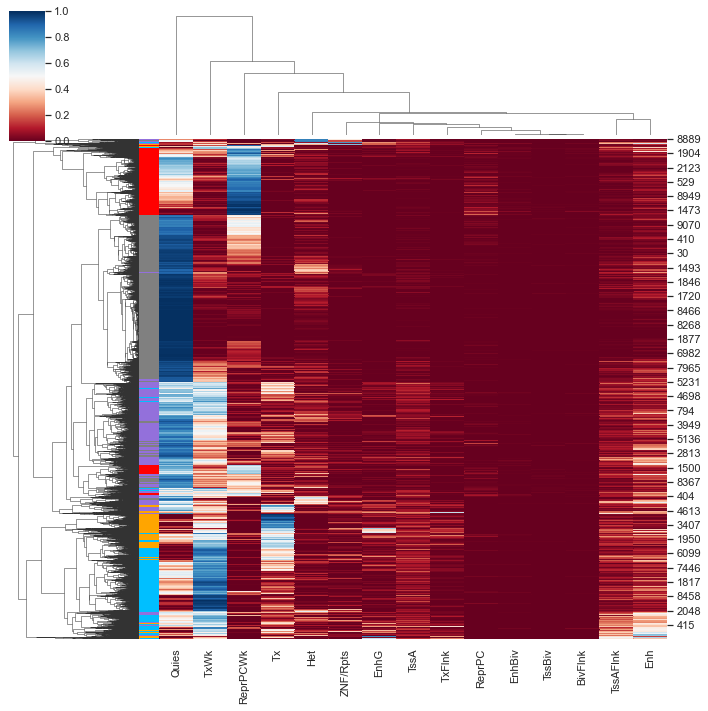

In [152]:
GM12878_clustermap_states = sns.clustermap(GM12878_enrichments_df, cmap="RdBu",row_cluster = True, row_colors = GM12878_kmeans_colors_states)
GM12878_clustermap_states

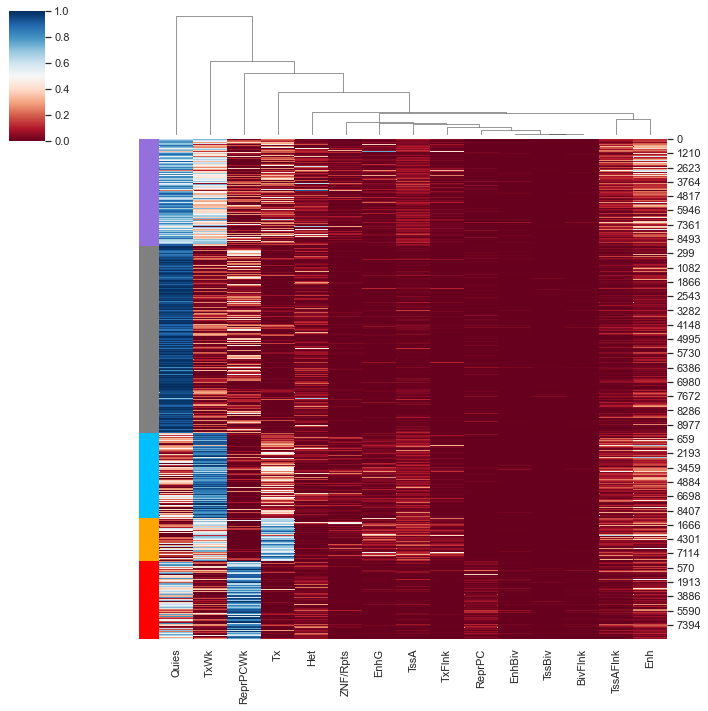

In [198]:
GM12878_clustermap_states_sorted = sns.clustermap(sorted_dataframe_enrichments, cmap="RdBu",row_cluster = False, row_colors = GM12878_kmeans_colors_states_sorted)
GM12878_clustermap_states_sorted

In [9]:
common_TADs_labels = np.array(common_TADs_meQTLs["KMeans_State_Labels"])
common_TADs_df["KMeans_States_Labels"] = common_TADs_labels
common_TADs_0 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 0]
common_TADs_1 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 1]
common_TADs_2 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 2]
common_TADs_3 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 3]
common_TADs_4 = common_TADs_df[common_TADs_df["KMeans_States_Labels"] == 4]
common_TADs_frames = [common_TADs_0, common_TADs_1, common_TADs_2, common_TADs_3, common_TADs_4]
common_TADs_enrichment_sorted = pd.concat(common_TADs_frames)
common_TADs_enrichment_sorted

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies,KMeans_States_Labels
4,0.038102,0.041566,0.003464,0.083132,0.289232,0.005196,0.244202,0.000000,0.055422,0.000000,0.000000,0.000000,0.000000,0.102184,0.912726,0
12,0.069083,0.233346,0.027633,0.254838,0.419102,0.099786,0.270190,0.139701,0.085970,0.000000,0.000000,0.000000,0.000000,0.052196,0.766050,0
18,0.024443,0.054441,0.000000,0.106661,0.527748,0.001111,0.155547,0.009999,0.000000,0.000000,0.000000,0.000000,0.000000,0.209988,0.798845,0
21,0.064477,0.242862,0.017194,0.012895,0.431993,0.004298,0.257907,0.060178,0.126804,0.000000,0.006448,0.002149,0.000000,0.000000,0.814555,0
23,0.012826,0.089780,0.000000,0.000000,0.646413,0.000000,0.371944,0.041042,0.130822,0.005130,0.012826,0.000000,0.010261,0.092345,0.638718,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004205,0.000000,0.050454,0.000000,0.000000,0.000000,0.004205,0.870338,0.489828,4
1065,0.048953,0.088431,0.030003,0.222656,0.184757,0.023687,0.137384,0.023687,0.023687,0.006316,0.004737,0.007896,0.041057,0.851146,0.397938,4
1074,0.015968,0.017109,0.000000,0.018249,0.015968,0.000000,0.006843,0.000000,0.014827,0.001141,0.004562,0.017109,0.258909,0.960358,0.094667,4
1081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002941,0.000000,0.000000,0.000000,0.025488,0.861676,0.506810,4


In [10]:
commonTADs_labels_sorted = np.array(common_TADs_enrichment_sorted["KMeans_States_Labels"])
common_TADs_enrichment_sorted = common_TADs_enrichment_sorted.drop(["KMeans_States_Labels"], axis = 1)
commonTADs_kmeans_colors_states_sorted = []
for lab in commonTADs_labels_sorted:
    if lab == 0:
        commonTADs_kmeans_colors_states_sorted.append("mediumpurple")
    elif lab == 1:
        commonTADs_kmeans_colors_states_sorted.append("grey")
    elif lab == 2:
        commonTADs_kmeans_colors_states_sorted.append("deepskyblue")
    elif lab == 3:
        commonTADs_kmeans_colors_states_sorted.append("orange")
    else:
        commonTADs_kmeans_colors_states_sorted.append("red")
print(len(commonTADs_kmeans_colors_states_sorted))

1100


Text(0.5, 0.98, 'Enrichment of 15 Chromatin States Across 1100 TADs')

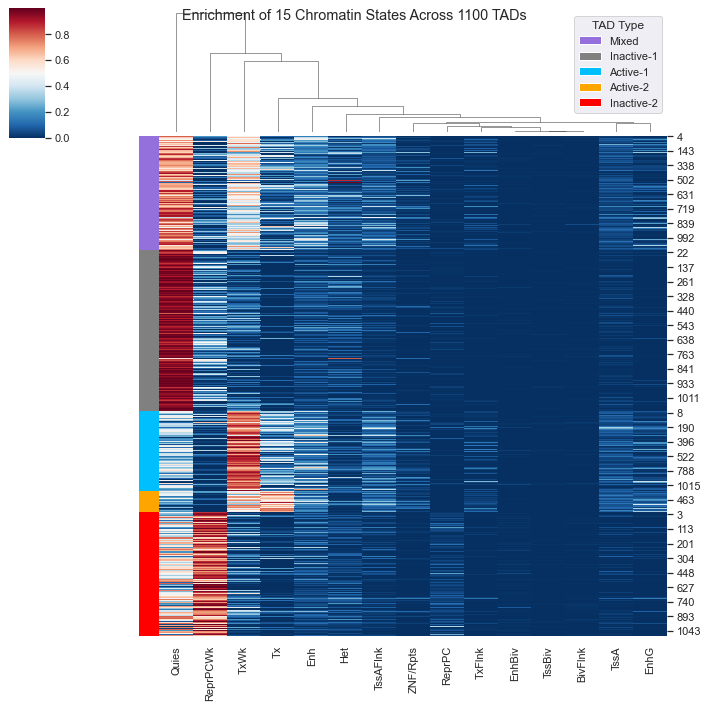

In [29]:
commonTADs_clustermap_states_sorted = sns.clustermap(common_TADs_enrichment_sorted, cmap="RdBu_r",row_cluster = False, row_colors = commonTADs_kmeans_colors_states_sorted)

handles = [Patch(facecolor="mediumpurple",label='Mixed'),
                   Patch(facecolor="grey",label='Inactive-1'),
                   Patch(facecolor="deepskyblue",label='Active-1'), 
                   Patch(facecolor="orange",label='Active-2'),
                   Patch(facecolor="red",label='Inactive-2')]
#fig, ax = plt.subplots()
#plt.title("Enrichment of 15 Chromatin States Across 1100 TADs")
commonTADs_clustermap_states_sorted.ax_heatmap.legend(handles=handles, bbox_to_anchor=(1,1.25), title='TAD Type', 
                                                      loc='upper right')
commonTADs_clustermap_states_sorted.fig.suptitle('Enrichment of 15 Chromatin States Across 1100 TADs') 


In [206]:
common_TADs_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,...,1,1,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,...,0,1,219,4,122,97,825000,0.075906,0.042846,0.037893
2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,...,0,0,283,4,90,194,340000,0.238009,0.076695,0.183891
3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,...,0,0,301,4,201,189,655000,0.131405,0.088911,0.092995
4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,...,1,1,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,...,0,0,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,...,0,0,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,...,1,1,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,...,0,0,0,1,0,0,155000,0.000000,0.000000,0.000000


In [200]:
sorted_frames_common = [labels_0, labels_1, labels_2, labels_3, labels_4]
sorted_common_TADs_meQTLs = pd.concat(sorted_frames_common)
sorted_common_TADs_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.51280,0.032783,0.049931,...,1,1,38,0,26,22,205000,0.053005,0.036747,0.034587
12,1,112000000,112315000,1,112000000,112315000,"255,255,0",1.84700,0.053837,0.054516,...,0,0,173,0,71,118,315000,0.157044,0.065305,0.120728
18,1,182880000,183220000,1,182880000,183220000,"255,255,0",1.42760,0.069814,0.038614,...,0,0,740,0,705,173,340000,0.622357,0.600774,0.163985
21,1,198475000,198665000,1,198475000,198665000,"255,255,0",1.65970,0.034077,0.050553,...,0,0,0,0,0,0,190000,0.000000,0.000000,0.000000
23,1,15450000,15610000,1,15450000,15610000,"255,255,0",1.59380,0.052914,0.041272,...,0,0,445,0,246,318,160000,0.795292,0.445468,0.640539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,9,136060000,136195000,9,136060000,136195000,"255,255,0",1.16410,0.039810,0.030440,...,0,0,2,4,2,0,135000,0.004236,0.004292,0.000000
1065,9,117160000,117425000,9,117160000,117425000,"255,255,0",1.70170,0.055067,0.043111,...,0,0,225,4,147,170,265000,0.242786,0.160721,0.206748
1074,9,34385000,34635000,9,34385000,34635000,"255,255,0",1.68030,0.046303,0.053673,...,0,0,53,4,43,10,250000,0.060621,0.049834,0.012891
1081,9,112315000,112600000,9,112315000,112600000,"255,255,0",1.32680,0.058339,0.059279,...,1,1,4,4,1,3,285000,0.004013,0.001017,0.003392


In [70]:
commonTADs_kmeans_labels = [-1]*1100
for i, row in common_TADs_meQTLs.iterrows():
    common_chr = GM12878_TADs[GM12878_TADs["chr1"] == row["chr1"]]
    desired = common_chr[(common_chr["x1"] == row["x1"]) & (common_chr["x2"] == row["x2"])]
    ind = desired.index.tolist()[0]
    commonTADs_kmeans_labels[i] = desired.at[ind, "KMeans_Labels"]
print(len(commonTADs_kmeans_labels))

1100


In [88]:
meqtl_files=os.listdir("Carter Lab Datasets/meQTL Data/")
compiled_meqtl=pd.DataFrame()

for x in meqtl_files:
    if x == "BLCA_tumor.cis_meQTL.txt":
        df = pd.read_csv("Carter Lab Datasets/meQTL Data/"+x, delimiter = "\t")
    else:
        df=pd.read_csv("Carter Lab Datasets/meQTL Data/"+x)
    df["cancer"]=x.split("_")[0]
    compiled_meqtl=compiled_meqtl.append(df)

compiled_meqtl["chr"]=compiled_meqtl["snp_position"].str.split(":").str[0]
compiled_meqtl["bp"]=compiled_meqtl["snp_position"].str.split(":").str[1]

compiled_meqtl["bp"]=pd.to_numeric(compiled_meqtl["bp"])
compiled_meqtl["p-value"]=pd.to_numeric(compiled_meqtl["p-value"],errors="coerce")
compiled_meqt_sig=compiled_meqtl[compiled_meqtl["p-value"]<.00001]
compiled_meqt_sig=compiled_meqt_sig[compiled_meqt_sig["p-value"]>0]

In [214]:
compiled_meqt_sig.to_csv("Carter Lab Datasets/meQTL Data/all_cancers_meQTLs.csv")

In [102]:
compiled_meqt_sig['r'] = compiled_meqt_sig['r'].astype(float)

In [103]:
num_meqtl_positive=[]
for i,row in common_TADs_meQTLs.iterrows():
    if i % 100 == 0:
        print("{} rows done".format(i))
    meqtl_chr=compiled_meqt_sig[compiled_meqt_sig["chr"]=="chr"+str(row["chr1"])]
    meqtl_sig=meqtl_chr[(meqtl_chr["bp"]>row["x1"])&(meqtl_chr["bp"]<row["x2"])]
    #print(meqtl_sig["r"])
    positive_corr = meqtl_sig[meqtl_sig["r"] > 0]
    num_meqtl_positive.append(len(positive_corr["snp"].unique()))

0 rows done
100 rows done
200 rows done
300 rows done
400 rows done
500 rows done
600 rows done
700 rows done
800 rows done
900 rows done
1000 rows done


In [104]:
common_TADs_meQTLs["#meqtl_pos"] = num_meqtl_positive

In [105]:
num_meqtl_negative=[]
for i,row in common_TADs_meQTLs.iterrows():
    if i % 100 == 0:
        print("{} rows done".format(i))
    meqtl_chr=compiled_meqt_sig[compiled_meqt_sig["chr"]=="chr"+str(row["chr1"])]
    meqtl_sig=meqtl_chr[(meqtl_chr["bp"]>row["x1"])&(meqtl_chr["bp"]<row["x2"])]
    negative_corr = meqtl_sig[meqtl_sig["r"] < 0]
    num_meqtl_negative.append(len(negative_corr["snp"].unique()))

0 rows done
100 rows done
200 rows done
300 rows done
400 rows done
500 rows done
600 rows done
700 rows done
800 rows done
900 rows done
1000 rows done


In [106]:
common_TADs_meQTLs["#meqtl_neg"] = num_meqtl_negative

In [136]:
common_TADs_meQTLs["domain_size"] = common_TADs_meQTLs["x2"] - common_TADs_meQTLs["x1"]
common_TADs_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,H3K4me3,H3K27me3,H4K20me1,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size
0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,...,0.157722,0.167622,0.705304,1,1,206,4,71,141,950000
1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,...,0.139404,0.226065,0.369001,0,1,219,4,122,97,825000
2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,...,0.706817,0.275085,0.000000,0,0,283,4,90,194,340000
3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,...,0.694064,0.244738,0.000000,0,0,301,4,201,189,655000
4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,...,0.241590,0.499037,0.704529,1,1,38,0,26,22,205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,...,0.000000,0.000000,0.000000,0,0,0,0,0,0,205000
1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,...,0.570525,1.000000,0.000000,0,0,0,1,0,0,250000
1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,...,0.000000,0.000000,1.000000,1,1,0,1,0,0,235000
1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,...,0.000000,0.000000,0.000000,0,0,0,1,0,0,155000


In [137]:
print(min(common_TADs_meQTLs["domain_size"]))
print(max(common_TADs_meQTLs["domain_size"]))
print(common_TADs_meQTLs["domain_size"].std())

115000
1080000
105141.63023262563


In [138]:
print(np.mean(np.array(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 0)]["#meqtl"])))
print(np.mean(np.array(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 1)]["#meqtl"])))
print(np.mean(np.array(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 2)]["#meqtl"])))
print(np.mean(np.array(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 3)]["#meqtl"])))
print(np.mean(np.array(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 4)]["#meqtl"])))

161.53968253968253
132.48169014084507
151.29545454545453
230.67391304347825
144.5830258302583


In [112]:
print("# of 1 labels", len(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 0)]))
print("# of 2 labels", len(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 1)]))
print("# of 3 labels", len(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 2)]))
print("# of 4 labels", len(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 3)]))
print("# of 5 labels", len(common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 4)]))

# of 1 labels 252
# of 2 labels 355
# of 3 labels 176
# of 4 labels 46
# of 5 labels 271


In [178]:
labels_0 = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 0)]
labels_1 = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 1)]
labels_2 = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 2)]
labels_3 = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 3)]
labels_4 = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 4)]

In [148]:
labels_2

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,H3K27me3,H4K20me1,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size
7,1,180845000,181140000,1,180845000,181140000,"255,255,0",1.69150,0.035441,0.056758,...,0.704361,1.000000,1,1,222,2,106,122,295000,0.215188
8,1,93305000,93470000,1,93305000,93470000,"255,255,0",1.68410,0.054183,0.045323,...,0.306079,0.000000,0,0,197,2,117,127,165000,0.341404
9,1,150520000,150970000,1,150520000,150970000,"255,255,0",1.13190,0.039474,0.043054,...,0.000000,0.666327,1,1,489,2,476,464,450000,0.310730
11,1,21555000,21700000,1,21555000,21700000,"255,255,0",1.47930,0.061990,0.043771,...,0.338120,1.000000,1,1,82,2,56,39,145000,0.161708
13,1,90260000,90465000,1,90260000,90465000,"255,255,0",1.79610,0.030654,0.066911,...,0.707107,0.000000,0,0,72,2,29,67,205000,0.100430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,9,114660000,114840000,9,114660000,114840000,"255,255,0",1.69010,0.023051,0.050608,...,0.282260,1.000000,1,1,25,2,3,22,180000,0.039715
1055,9,127950000,128140000,9,127950000,128140000,"255,255,0",1.51430,0.020395,0.032239,...,0.000000,0.385818,1,1,44,2,17,41,190000,0.066219
1064,9,5440000,5595000,9,5440000,5595000,"255,255,0",1.90090,0.045118,0.044864,...,0.000000,0.000000,0,0,4,2,3,1,155000,0.007379
1066,9,20620000,20935000,9,20620000,20935000,"255,255,0",0.98522,0.025596,0.051612,...,0.000000,0.000000,0,0,12,2,7,5,315000,0.010893


In [161]:
meqtl_by_size = np.array(common_TADs_meQTLs["#meqtl"])/np.array(common_TADs_meQTLs["domain_size"])
norm_meqtl_by_size = (meqtl_by_size - np.min(meqtl_by_size)) / (np.max(meqtl_by_size) - np.min(meqtl_by_size))
common_TADs_meQTLs["norm_meqtl_by_size"] = norm_meqtl_by_size
common_TADs_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,H3K27me3,H4K20me1,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size
0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,...,0.167622,0.705304,1,1,206,4,71,141,950000,0.062006
1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,...,0.226065,0.369001,0,1,219,4,122,97,825000,0.075906
2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,...,0.275085,0.000000,0,0,283,4,90,194,340000,0.238009
3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,...,0.244738,0.000000,0,0,301,4,201,189,655000,0.131405
4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,...,0.499037,0.704529,1,1,38,0,26,22,205000,0.053005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,...,0.000000,0.000000,0,0,0,0,0,0,205000,0.000000
1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,...,1.000000,0.000000,0,0,0,1,0,0,250000,0.000000
1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,...,0.000000,1.000000,1,1,0,1,0,0,235000,0.000000
1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,...,0.000000,0.000000,0,0,0,1,0,0,155000,0.000000


In [164]:
pos_meqtl_by_size = np.array(common_TADs_meQTLs["#meqtl_pos"])/np.array(common_TADs_meQTLs["domain_size"])
pos_norm_meqtl_by_size = (pos_meqtl_by_size - np.min(pos_meqtl_by_size)) / (np.max(pos_meqtl_by_size) - np.min(pos_meqtl_by_size))
common_TADs_meQTLs["norm_pos_meqtl_by_size"] = pos_norm_meqtl_by_size
common_TADs_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,H4K20me1,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size
0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,...,0.705304,1,1,206,4,71,141,950000,0.062006,0.021654
1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,...,0.369001,0,1,219,4,122,97,825000,0.075906,0.042846
2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,...,0.000000,0,0,283,4,90,194,340000,0.238009,0.076695
3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,...,0.000000,0,0,301,4,201,189,655000,0.131405,0.088911
4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,...,0.704529,1,1,38,0,26,22,205000,0.053005,0.036747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,...,0.000000,0,0,0,0,0,0,205000,0.000000,0.000000
1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,...,0.000000,0,0,0,1,0,0,250000,0.000000,0.000000
1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,...,1.000000,1,1,0,1,0,0,235000,0.000000,0.000000
1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,...,0.000000,0,0,0,1,0,0,155000,0.000000,0.000000


In [168]:
neg_meqtl_by_size = np.array(common_TADs_meQTLs["#meqtl_neg"])/np.array(common_TADs_meQTLs["domain_size"])
neg_norm_meqtl_by_size = (neg_meqtl_by_size - np.min(neg_meqtl_by_size)) / (np.max(neg_meqtl_by_size) - np.min(neg_meqtl_by_size))
common_TADs_meQTLs["norm_neg_meqtl_by_size"] = neg_norm_meqtl_by_size
common_TADs_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,...,1,1,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,...,0,1,219,4,122,97,825000,0.075906,0.042846,0.037893
2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,...,0,0,283,4,90,194,340000,0.238009,0.076695,0.183891
3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,...,0,0,301,4,201,189,655000,0.131405,0.088911,0.092995
4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,...,1,1,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,...,0,0,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,...,0,0,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,...,1,1,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,...,0,0,0,1,0,0,155000,0.000000,0.000000,0.000000


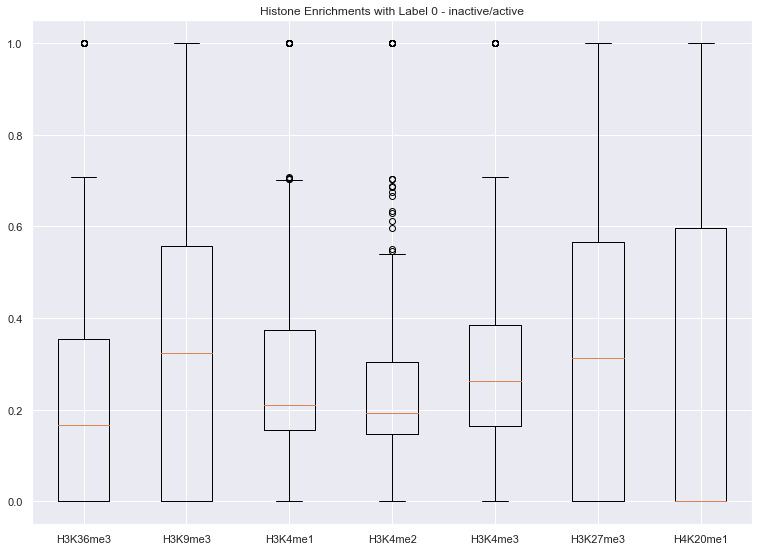

In [175]:
data_histone0 = [labels_0["H3K36me3"], labels_0["H3K9me3"], labels_0["H3K4me1"], labels_0["H3K4me2"], labels_0["H3K4me3"], labels_0["H3K27me3"], labels_0["H4K20me1"]]
fig_histone0 = plt.figure(figsize =(10, 7))
ax0 = fig_histone0.add_axes([0, 0, 1, 1])
boxplt0 = ax0.boxplot(data_histone0)
ax0.set_xticklabels(['H3K36me3', 'H3K9me3','H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3', 'H4K20me1'])
plt.title("Histone Enrichments with Label 0 - inactive/active")
plt.show()

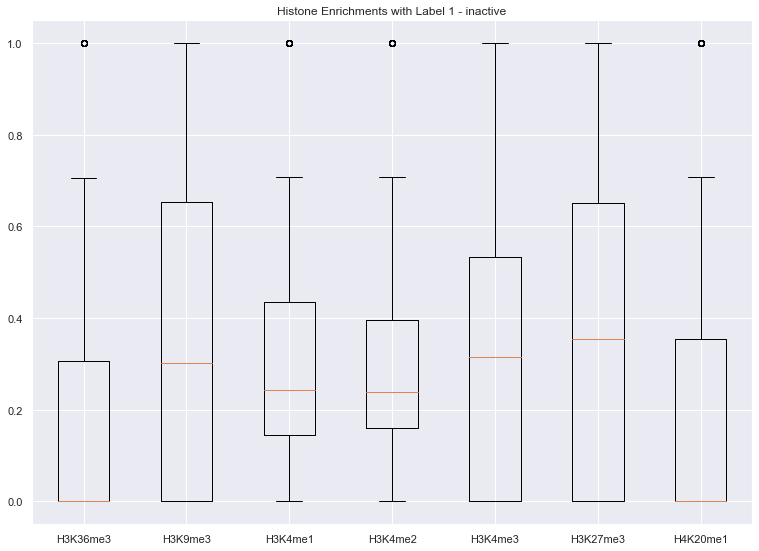

In [131]:
data_histone1 = [labels_1["H3K36me3"], labels_1["H3K9me3"], labels_1["H3K4me1"], labels_1["H3K4me2"], labels_1["H3K4me3"], labels_1["H3K27me3"], labels_1["H4K20me1"]]
fig_histone1 = plt.figure(figsize =(10, 7))
ax1 = fig_histone1.add_axes([0, 0, 1, 1])
boxplt1 = ax1.boxplot(data_histone1)
ax1.set_xticklabels(['H3K36me3', 'H3K9me3','H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3', 'H4K20me1'])
plt.title("Histone Enrichments with Label 1 - inactive")
plt.show()

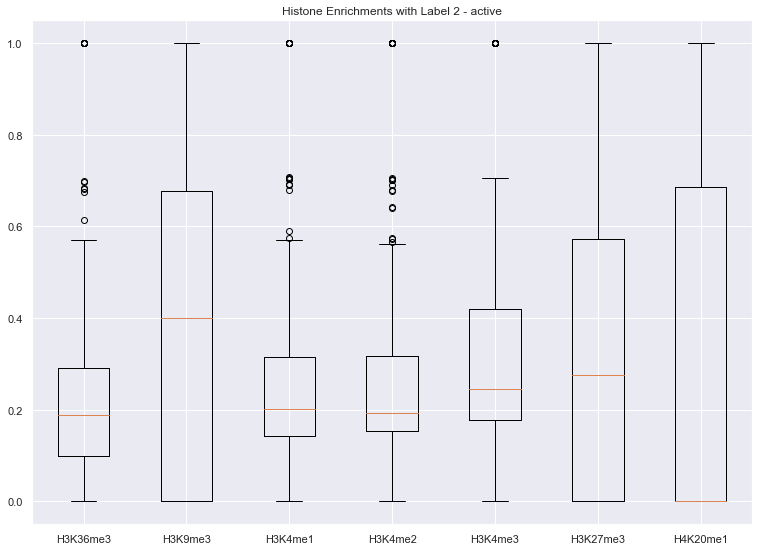

In [135]:
data_histone2 = [labels_2["H3K36me3"], labels_2["H3K9me3"], labels_2["H3K4me1"], labels_2["H3K4me2"], labels_2["H3K4me3"], labels_2["H3K27me3"], labels_2["H4K20me1"]]
fig_histone2 = plt.figure(figsize =(10, 7))
ax2 = fig_histone2.add_axes([0, 0, 1, 1])
boxplt2 = ax2.boxplot(data_histone2)
ax2.set_xticklabels(['H3K36me3', 'H3K9me3','H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3', 'H4K20me1'])
plt.title("Histone Enrichments with Label 2 - active")
plt.show()

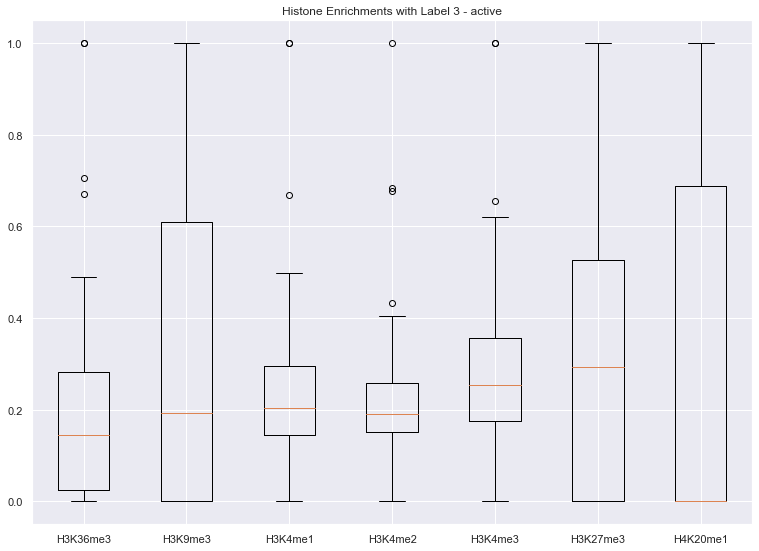

In [133]:
data_histone3 = [labels_3["H3K36me3"], labels_3["H3K9me3"], labels_3["H3K4me1"], labels_3["H3K4me2"], labels_3["H3K4me3"], labels_3["H3K27me3"], labels_3["H4K20me1"]]
fig_histone3 = plt.figure(figsize =(10, 7))
ax3 = fig_histone3.add_axes([0, 0, 1, 1])
boxplt3 = ax3.boxplot(data_histone3)
ax3.set_xticklabels(['H3K36me3', 'H3K9me3','H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3', 'H4K20me1'])
plt.title("Histone Enrichments with Label 3 - active")
plt.show()

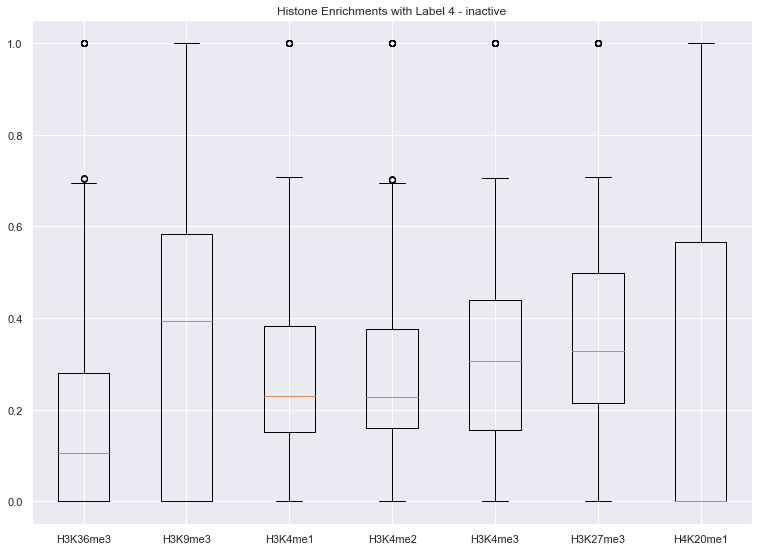

In [134]:
data_histone4 = [labels_4["H3K36me3"], labels_4["H3K9me3"], labels_4["H3K4me1"], labels_4["H3K4me2"], labels_4["H3K4me3"], labels_4["H3K27me3"], labels_4["H4K20me1"]]
fig_histone4 = plt.figure(figsize =(10, 7))
ax4 = fig_histone4.add_axes([0, 0, 1, 1])
boxplt4 = ax4.boxplot(data_histone4)
ax4.set_xticklabels(['H3K36me3', 'H3K9me3','H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3', 'H4K20me1'])
plt.title("Histone Enrichments with Label 4 - inactive")
plt.show()

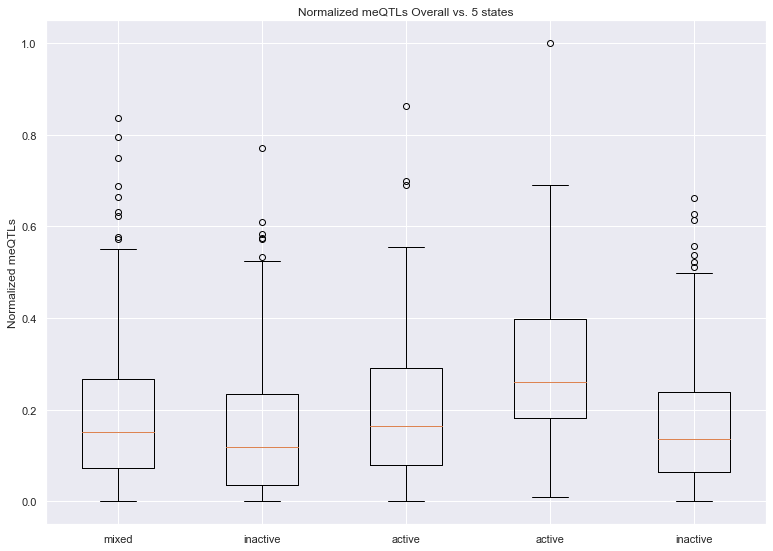

In [211]:
data_all = [labels_0["norm_meqtl_by_size"].tolist(), labels_1["norm_meqtl_by_size"].tolist(), labels_2["norm_meqtl_by_size"].tolist(), labels_3["norm_meqtl_by_size"].tolist(), labels_4["norm_meqtl_by_size"].tolist()]
fig3 = plt.figure(figsize =(10, 7))
ax3 = fig3.add_axes([0, 0, 1, 1])
boxplt3 = ax3.boxplot(data_all)
plt.ylabel("Normalized meQTLs")
plt.title("Normalized meQTLs Overall vs. 5 states")
ax3.set_xticklabels(['mixed', 'inactive','active', 'active', 'inactive'])
plt.show()

In [166]:
common_TADs_meQTLs["KMeans_State_Labels"] = commonTADs_kmeans_labels
data1_pos = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 0)]["norm_pos_meqtl_by_size"].tolist()
data2_pos = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 1)]["norm_pos_meqtl_by_size"].tolist()
data3_pos = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 2)]["norm_pos_meqtl_by_size"].tolist()
data4_pos = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 3)]["norm_pos_meqtl_by_size"].tolist()
data5_pos = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 4)]["norm_pos_meqtl_by_size"].tolist()
data1_pos

[0.03674689064771442,
 0.06530537159676232,
 0.6007742500973899,
 0.0,
 0.4454677152317881,
 0.1847061258278146,
 0.08904054272330802,
 0.0954005814892586,
 0.38370323966350456,
 0.11175496688741722,
 0.08392327015300297,
 0.06977294228949858,
 0.022036190653856917,
 0.22045061906133026,
 0.10697911360163015,
 0.1976407284768212,
 0.22182843543046357,
 0.12831125827814568,
 0.6123946417820589,
 0.0793428425878757,
 0.09131045554886615,
 0.03369012782997074,
 0.1566135672095937,
 0.3725165562913907,
 0.16262550737022002,
 0.25915194996320823,
 0.23636284419658415,
 0.11357615894039735,
 0.012417218543046357,
 0.1418177065179505,
 0.034768211920529805,
 0.13936625031435995,
 0.17554538371640047,
 0.05794701986754967,
 0.08134870096790627,
 0.09153949515308571,
 0.06696100073583518,
 0.32732235546805083,
 0.18950241632360837,
 0.22902869757174393,
 0.015985384791048184,
 0.3435430463576159,
 0.010301692420897719,
 0.2000812195426715,
 0.11092715231788079,
 0.12437409142303343,
 0.28036131

In [169]:
data1_neg = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 0)]["norm_neg_meqtl_by_size"].tolist()
data2_neg = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 1)]["norm_neg_meqtl_by_size"].tolist()
data3_neg = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 2)]["norm_neg_meqtl_by_size"].tolist()
data4_neg = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 3)]["norm_neg_meqtl_by_size"].tolist()
data5_neg = common_TADs_meQTLs[(common_TADs_meQTLs["KMeans_State_Labels"] == 4)]["norm_neg_meqtl_by_size"].tolist()
data1_neg

[0.03458653371064097,
 0.12072846326989974,
 0.1639854836962409,
 0.0,
 0.6405386740331492,
 0.3370549416820135,
 0.05816826124062345,
 0.08410816152360417,
 0.4111293614056045,
 0.11663597298956414,
 0.013335873499714232,
 0.1354906603525388,
 0.04085285191813867,
 0.3040675794699335,
 0.11403881569627426,
 0.07251381215469613,
 0.1994129834254144,
 0.04834254143646408,
 0.5053992968357609,
 0.2032865845020541,
 0.19337016574585633,
 0.1274144502976573,
 0.17072320939724253,
 0.0718232044198895,
 0.33060060595259316,
 0.19157970124820953,
 0.25273819908888245,
 0.10570902394106814,
 0.08287292817679558,
 0.15774934574004068,
 0.06629834254143646,
 0.017134065319253093,
 0.017062073448163795,
 0.31744935543278086,
 0.047102989091939364,
 0.16908212560386474,
 0.11888684264374871,
 0.20556468070280226,
 0.04006769200139366,
 0.25475751995089013,
 0.08890582333142821,
 0.4358502148557397,
 0.1131573562512789,
 0.1216164564439348,
 0.09208103130755065,
 0.1383461348425639,
 0.377261401798

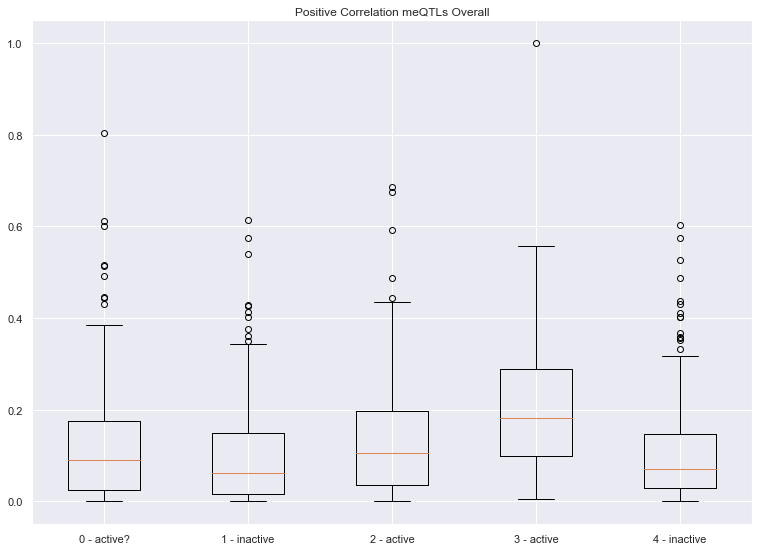

In [173]:
data_pos = [data1_pos, data2_pos, data3_pos, data4_pos, data5_pos]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxplt = ax.boxplot(data_pos)
plt.title("Positive Correlation meQTLs Overall")
ax.set_xticklabels(['0 - active?', '1 - inactive','2 - active', '3 - active', '4 - inactive'])
plt.show()

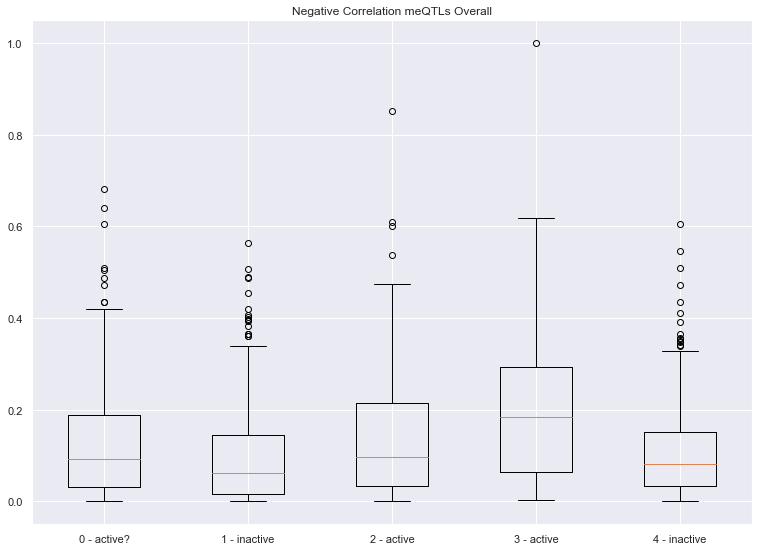

In [174]:
data_neg = [data1_neg, data2_neg, data3_neg, data4_neg, data5_neg]
fig2 = plt.figure(figsize =(10, 7))
ax2 = fig2.add_axes([0, 0, 1, 1])
boxplt = ax2.boxplot(data_neg)
plt.title("Negative Correlation meQTLs Overall")
ax2.set_xticklabels(['0 - active?', '1 - inactive','2 - active', '3 - active', '4 - inactive'])
plt.show()

In [176]:
common_TADs_meQTLs.to_csv("Carter Lab Datasets/common_TADs_meQTLs.csv")

In [212]:
common_TADs_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,...,KMeans_Label,Label,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,...,1,1,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,...,0,1,219,4,122,97,825000,0.075906,0.042846,0.037893
2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,...,0,0,283,4,90,194,340000,0.238009,0.076695,0.183891
3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,...,0,0,301,4,201,189,655000,0.131405,0.088911,0.092995
4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,...,1,1,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,...,0,0,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,...,0,0,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,...,1,1,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,...,0,0,0,1,0,0,155000,0.000000,0.000000,0.000000
